<a href="https://colab.research.google.com/github/50UM3N/digital-image-processing/blob/main/Kmeans_Clustering_of_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import copy
import math

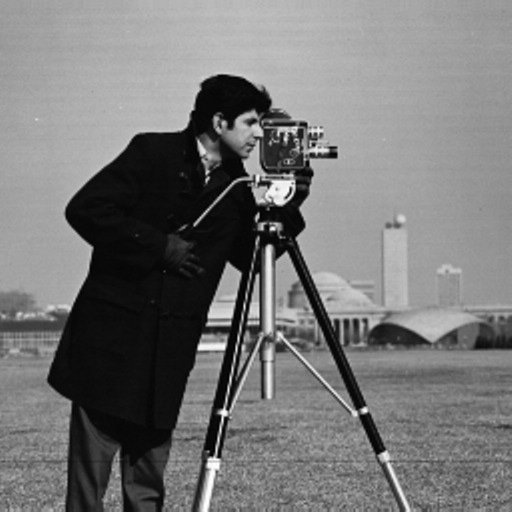

In [27]:
img = cv2.imread('/content/drive/MyDrive/CV/7.png')
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayImg)

In [15]:
intencity = [85,113,142,170,198, 227, 255]
# distance calculation
def distance(list1, list2):
  sum = 0
  for i in range(len(list1)):
    sum+=(list1[i]-list2[i])**2
  return math.sqrt(sum)

# centroid calculation
def calcCentroid(newList, data, noa):
  newCentroid = {}
  for i in newList:
    sum = []
    for index in range(noa):
      sum.append(0)
    for j in newList[i]: #j have the list of each fragment [1, 5, ..... ]
      current = data[j]
      for l in range(len(data[j])): # each element attribute
        sum[l]+=current[l]
    for n in range(len(sum)):
      sum[n] =  sum[n]/ len(newList[i])
    newCentroid[i] = sum
  return newCentroid

# chacking that the two centroid is similar or not
def checkCentroied(current, previous):
  flag= True
  for i in range(len(current)):
    if current[i] != previous[i]:
      flag= False
  return flag

# clustering the data
def cluster(k,data, seed,breakPoint):
  np.random.seed(seed);
  random =  np.random.randint(low = 1, high = len(data), size = k)
  centroid = {}
  for i in range(len(random)):
    centroid[i]=data[random[i]]
  dMat = {}
  division = {}
  for index in range(breakPoint):
    for i in data:
      dist = []
      for j in centroid:
        dist.append(distance(data[i],centroid[j]))
      dMat[i]=dist
    division = {}
    for i in range(k):
      division[i] = []
    for i in dMat:
      division[dMat[i].index(min(dMat[i]))].append(i)
    currentCentroid=calcCentroid(division,data,len(X[1]))
    print(centroid)
    if(checkCentroied(centroid,currentCentroid)):
      centroid=currentCentroid
      break
    centroid=currentCentroid

  formatedData = {}
  for i in division:
    for j in division[i]:
        formatedData[j]=intencity[i]
  formatedList = []
  for i  in range(len(formatedData)):
    formatedList.append(formatedData[i])
  formatedCentroid = []
  for i in centroid:
    formatedCentroid.append(centroid[i])
  returnData = {"resultArray":np.array(formatedList),"centroid":np.array(formatedCentroid)}
  return returnData

Enter your value: 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


{0: [10], 1: [162], 2: [163], 3: [97], 4: [117]}
{0: [29.72684794600558], 1: [162.0], 2: [155.47891414418166], 3: [107.9972240365774], 4: [142.31631754564833]}
{0: [19.52874431511601], 1: [173.1523701207233], 2: [153.80160857908848], 3: [107.80369567987766], 4: [137.20653319283457]}
{0: [18.52146930031818], 1: [176.36903784528192], 2: [155.94712240148317], 3: [104.06118355065196], 4: [133.85196738357138]}
{0: [18.086138330363962], 1: [178.8434614454919], 2: [157.49241034195163], 3: [100.03760700516239], 4: [131.42926685351821]}
{0: [17.658643572151615], 1: [180.4625763934909], 2: [158.5389950594495], 3: [96.71232576007024], 4: [130.16585902095392]}
{0: [17.28535988195807], 1: [181.20129323013617], 2: [158.98603261222632], 3: [94.17491658488714], 4: [129.3583709251851]}
{0: [16.893075890078936], 1: [181.9033420093701], 2: [159.4005626758362], 3: [91.39621767332154], 4: [128.5573165788407]}
{0: [16.71375213900224], 1: [181.9033420093701], 2: [159.0846295162278], 3: [88.98368469294225], 4

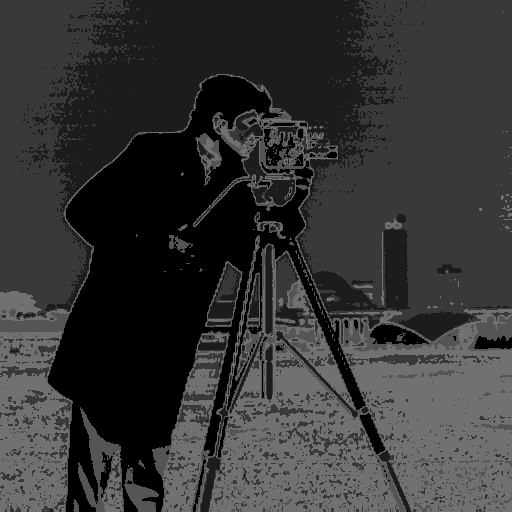

In [28]:
data = grayImg.flatten()
X={}
for i in range(len(data)):
  X[i]=[data[i]]

k = int(input("Enter your value: "))

kmeans = cluster(k,X,42,300)
y_kmeans = kmeans["resultArray"]
centroid = kmeans["centroid"]
print(np.unique(y_kmeans, return_counts=True))

y_kmeans=y_kmeans.reshape(grayImg.shape[0],grayImg.shape[1])
cv2_imshow(y_kmeans)